In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
data = pd.DataFrame(digits.data)
data

0    1     2     3     4     5     6    7    8     9   ...    54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0   0.0  ...   5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0   8.0  ...   9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
5     0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0   0.0  ...   4.0  0.0   
6     0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0   0.0  ...   8.0  0.0   
7     0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0   0.0  ...   0.0  0.0   
8     0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0   0.0  ...   8.0  0.0   
9     0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0   2.0  ...   4.0  0.0   
10    0.0  0.0   1.0   9.0  15.0  11.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
11    0.0  0.0   0.0   0.0  14.0  13.0   1.0  0.0  0.0   0.0  ...   0.0  0.0   
12    0.0  0.0   5.0  12.0   1.0   0.0   0.0  0.0  0.0   0.0  ...   8.0  2.0   
13    0.0  2.0   9.0  15.0  14.0   9.0   3.0  0.0  0.0   4.0  ...   6.0  0.0   
14    0.0  0.0   0.0   8.0  15.0   1.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
15    0.0  5.0  12.0  13.0  16.0  16.0   2.0  0.0  0.0  11.0  ...   0.0  0.0   
16    0.0  0.0   0.0   8.0  15.0   1.0   0.0  0.0  0.0   0.0  ...  16.0  2.0   
17    0.0  0.0   1.0   8.0  15.0  10.0   0.0  0.0  0.0   3.0  ...   0.0  0.0   
18    0.0  0.0  10.0   7.0  13.0   9.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
19    0.0  0.0   6.0  14.0   4.0   0.0   0.0  0.0  0.0   0.0  ...  16.0  2.0   
20    0.0  0.0   3.0  13.0  11.0   7.0   0.0  0.0  0.0   0.0  ...   1.0  0.0   
21    0.0  0.0   0.0   2.0  16.0  16.0   2.0  0.0  0.0   0.0  ...   2.0  0.0   
22    0.0  0.0   8.0  16.0   5.0   0.0   0.0  0.0  0.0   1.0  ...   3.0  0.0   
23    0.0  1.0   8.0  12.0  15.0  14.0   4.0  0.0  0.0   3.0  ...   0.0  0.0   
24    0.0  0.0   0.0   0.0  12.0   2.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
25    0.0  0.0  12.0   8.0   8.0   7.0   0.0  0.0  0.0   3.0  ...   0.0  0.0   
26    0.0  0.0   1.0  13.0  14.0   3.0   0.0  0.0  0.0   0.0  ...  12.0  0.0   
27    0.0  0.0   0.0   8.0  14.0  14.0   2.0  0.0  0.0   0.0  ...   0.0  0.0   
28    0.0  0.0  10.0  11.0   4.0   0.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
29    0.0  0.0   9.0  13.0   7.0   0.0   0.0  0.0  0.0   0.0  ...  16.0  2.0   
...   ...  ...   ...   ...   ...   ...   ...  ...  ...   ...  ...   ...  ...   
1767  0.0  0.0   0.0   2.0  16.0   1.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1768  0.0  0.0   5.0  16.0  10.0   0.0   0.0  0.0  0.0   0.0  ...   5.0  0.0   
1769  0.0  0.0   9.0  12.0  14.0   6.0   0.0  0.0  0.0   0.0  ...   2.0  0.0   
1770  0.0  2.0  10.0  12.0  16.0   8.0   0.0  0.0  0.0   4.0  ...   5.0  0.0   
1771  0.0  0.0   0.0   6.0  12.0   6.0   0.0  0.0  0.0   0.0  ...  12.0  0.0   
1772  0.0  0.0   5.0  14.0  11.0   8.0   0.0  0.0  0.0   4.0  ...   0.0  0.0   
1773  0.0  0.0   2.0  13.0  10.0   0.0   0.0  0.0  0.0   0.0  ...  12.0  0.0   
1774  0.0  0.0   6.0  12.0  12.0   6.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1775  0.0  0.0   6.0  16.0  16.0   3.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1776  0.0  0.0  12.0  16.0  16.0   7.0   0.0  0.0  0.0   3.0  ...   7.0  0.0   
1777  0.0  0.0   0.0   2.0  14.0   0.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1778  0.0  0.0   0.0   1.0  13.0   8.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1779  0.0  0.0   3.0  10.0  16.0  16.0   4.0  0.0  0.0   0.0  ...   0.0  0.0   
1780  0.0  3.0  14.0  15.0   6.0   0.0   0.0  0.0  0.0   7.0  ...   6.0  0.0   
1781  0.0  0.0  10.0  16.0  14.0   5.0   0.0  0.0  0.0   2.0  ...   1.0  0.0   
1782  0.0  1.0  10.0  13.0   2.0   0.0   0.0  0.0  0.0  10.0  ...  13.0  0.0   
1783  0.0  0.0  15.0  13.0   1.0   0.0   0.0  0.0  0.0   0.0  ...  14.0  0.0   
1784  0.0  0.0   1.0  10.0  14.0  13.0   1.0  0.0  0.0   0.0  ...   2.0  0.0   
1785  0

In [2]:


target = pd.DataFrame(digits.target)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1617, 64), (180, 64), (1617, 1), (180, 1))

In [3]:
vector = svm.SVC(gamma = 0.001, C=100)
vector

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
vector.fit(x_train,y_train)

/Users/anjuta/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
pred = vector.predict(x_test)


2


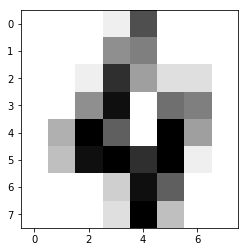

In [6]:
print(pred[4])
plt.imshow(digits.images[4], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [7]:
accuracy = accuracy_score(y_test, pred, normalize=True)
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
score = f1_score(y_test, pred, average='macro')
accuracy, precision, recall, f1_score

(0.9777777777777777,
 0.9800948146056842,
 0.9754134346046112,
 <function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>)

In [8]:
lgr = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)


/Users/anjuta/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/anjuta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
lgr_pred = lgr.predict(x_test)
lgr_pred.shape

(180,)

2


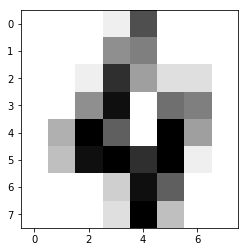

In [10]:
print(lgr_pred[4])
plt.imshow(digits.images[4], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [11]:
l_accuracy = accuracy_score(y_test, lgr_pred, normalize=True)
l_precision = precision_score(y_test, lgr_pred, average='macro')
l_recall = recall_score(y_test, lgr_pred, average='macro')
lgr_score = f1_score(y_test, lgr_pred, average='weighted')
l_accuracy, l_precision, l_recall, score

(0.9277777777777778, 0.9265726146918098, 0.928125830567781, 0.9774099885902212)